Solving Ordinary Differential Equations
====

## Unit 13, Lecture 1

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, April 24 2018

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import seaborn
seaborn.set_context("talk")
import scipy.stats

Goals:
---

0. Know the definition of ordinary differential equation
1. Be able to determine the order of an ordinary differential equation
2. Convert ordinary differential equations into standard form
3. Implement ordinary differential equations into python
4. Interpret the output from the ordinary differential equation solver in scipy

Classification of Ordinary Differential Equations
====

The word ordinary means that there are no partial derivative terms nor are there boundary conditions (only initial conditions).

1$^\textrm{st}$ Order vs. 2$^\textrm{nd}$ Order
---

A 1$^\textrm{st}$ order only has first derivatives and a second order has second derivatives and often first derivatives.

*First order Example:*

  * $\frac{dC}{dt} = -rC$ The rate of chage of concentration of a chemical species as a reaction proceeds
  
  * $\frac{dV}{dt} = kt$ Filling a tank at a constant rate ($k$)
  
  * $\frac{dV}{dt} = kt - A_{out}\sqrt{2g\frac{V}{A}}$ Filling a tank with a hole in it
  

*Second order Examples:*
  
  * $\frac{d^2x}{dt^2} + k x = 0$ An ideal spring-mass system
  
  * $\frac{d^2x}{dt^2} + b \frac{dx}{dt} + k x = 0$ A spring-mass system with dampening
  
  * $\frac{d^2T}{dx^2} = x$ Fourier's law of heat conduction

Solving ODEs in Python
===

Python can hanlde any order of system of ordinary differential equations. It cannot handle coupled (PDEs) or boundary problems. For those and all other things not in `scipy`, see this list of [numerical methods in python](http://www.scipy.org/topical-software.html)

To solve an ODE in python and all other programming languages/packages:

1. Convert to standard form
2. Implement the standardized equation as a Python function
3. Create a grid of points where you want to evaluate the ODE
4. Call `odeint` with the function, initial value, and grid

Converting to Standard Form
====

The standard form is:

$$ \frac{dy}{dt} = f(y,t)$$

All first order, second order and $n$th order ODEs can be conevrted into this form. Let's see some examples.

Converting 1st Order to Standard Form
---

The chemical reaction example:
  $$\frac{dC(t)}{dt} = -rC(t)$$
is already in standard form. So are all the other first-order examples given above.

Converting 2nd Order to Standard Form
---

The trick for the 2nd order form is to create a second dimension, the dimensions of the derivative, which turns the problem into 2D 1st order ODE. Let's see the spring mass system first:

$$\frac{d^2x(t)}{dt^2} + k\, x(t)= 0$$

Now we'll use a $x_1(t) = x(t)$ and $x_2(t) = \frac{dx(t)}{dt}$. I'll drop the function notation for simplicity now

$$\frac{dx_2}{dt} + kx_1 = 0$$

$$\frac{dx_2}{dt} = -k x_1$$

$$\frac{dx_1}{dt} = x_2 $$

Now we have two dimensions and their ODEs are both in standard form. 

Let's see the Fourier equation as another example:

$$\frac{d^2T}{dx^2} = x$$

$$T_1 = T$$

$$T_2 = \frac{dT}{dx}$$

Original diff eq: $$\frac{dT_2}{dx} = x$$

Result of our definition: $$\frac{dT_1}{dx} = T_2$$

Implementing the functions in Python
===

We need to implement the right-hand side of this equation:

$$\frac{dC}{dt} = -rC$$



In [2]:
def rxn_d(C, t, r=1):
    #I added a default argument so that I can easily solve
    return -r * C

Let's see the spring-mass system:


$$\frac{dx_1}{dt} = x_2 $$


$$\frac{dx_2}{dt} = -k x_1$$

Our function should return the RHS of the governing ODEs for each equation.

In [3]:
def ideal_spring(x,t,k=1):
    #This will get x as a vector!
    return np.array([x[1], x[0] * -k])

We'll do Fouier's law now:

$$\frac{dT_1}{dx} = T_2$$

$$\frac{dT_2}{dx} = x$$

In [4]:
def fourier(T, x, k=1):
    return np.array([T[1], k * x])

Using ODEInt In Python
===

Let's solve the reaction system

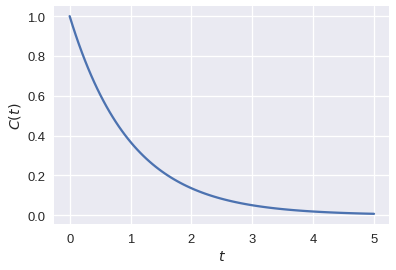

In [5]:
import scipy.integrate

#my initial condition
c_init = 1.0

#where I want to evaluate my function
t_points = np.linspace(0,5, 100)

c_points = scipy.integrate.odeint(rxn_d, c_init, t_points)

plt.plot(t_points, c_points)
plt.xlabel('$t$')
plt.ylabel('$C(t)$')
plt.show()

Let's solve the spring-mass system

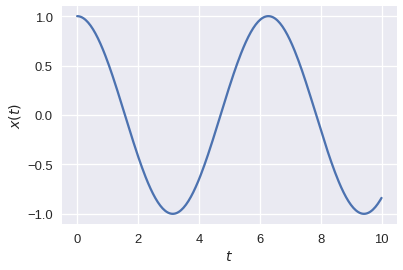

In [6]:
#This is just pasted from above
def ideal_spring(x,t,k=1):
    #This will get x as a vector!
    return np.array([x[1], x[0] * -k])

x_init = [1.0, 0] #The position is at 1.0 and has no velocity
t_points = np.linspace(0,10, 250)

x_points = scipy.integrate.odeint(ideal_spring, x_init, t_points)

plt.plot(t_points, x_points[:,0]) #Only plot x[0], the actual x-position
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.show()

What about the dampened system?

$$\frac{dx_1}{dt} = x_2 $$


$$\frac{dx_2}{dt} = -k x_1 - b x_2$$


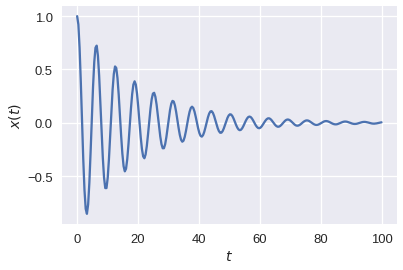

In [7]:
#This is just pasted from above
def damp_spring(x,t,k=1, b=0.1):
    #This will get x as a vector!
    return np.array([x[1], x[0] * -k - b * x[1]])

x_init = [1.0, 0] #The position is at 1.0 and has no velocity
t_points = np.linspace(0,100, 250)

x_points = scipy.integrate.odeint(damp_spring, x_init, t_points)

plt.plot(t_points, x_points[:,0]) #Only plot x[0], the actual x-position
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.show()

Since we're in python, we can do some programming to explore the parameter space. Let's do a for-loop to see the effect of different dampenings

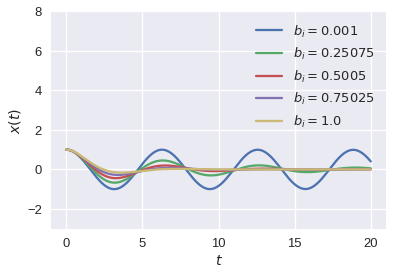

In [9]:
x_init = [1.0, 0] #The position is at 1.0 and has no velocity
t_points = np.linspace(0,20, 250)

for bi in np.linspace(0.001, 1.0, 5):
    x_points = scipy.integrate.odeint(lambda x,t: damp_spring(x,t,k=1.0, b=bi), x_init, t_points)
    plt.plot(t_points, x_points[:,0], label='$b_i = {}$'.format(bi)) #Only plot x[0], the actual x-position

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.ylim(-3, 8) #this is to leave enough room for a legend
plt.legend()
plt.show()

Integration Method
===

We're using the [lsoda](http://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html) solver when we call `odeint`. You can choose between many more by using the more complex `ode` interface in `scipy`. We won't cover this in lecture, but this allows you to explore other types of solution methods including the famous runge-kutta method and methods for complex numbers